In [54]:
import subprocess as sp
import matplotlib.pyplot as plt

from __init__ import *
from snmcseq_utils import create_logger
from snmcseq_utils import cd

In [55]:
log = create_logger()
log.info('.')

05/02/2018 12:15:55 PM .


In [61]:
dataset = 'CEMBA_4A_180206'
path_dataset = os.path.join(PATH_DATASETS, dataset)

# Gzip to bgzip

In [ ]:
# make allc folder and symlic from from_ecker_lab

os.makedirs(os.path.join(path_dataset, 'allc'))

## Case 1

In [5]:
# allc_folders = glob.glob(os.path.join(path_dataset, 'from_ecker_lab', '*'))

# should be parallelized in the future
# for i, allc_folder in enumerate(allc_folders):
data_folder = os.path.join(PATH_DATASETS, dataset, 'from_ecker_lab')
with cd(data_folder):
    allc_files = glob.glob('allc_*.tsv.gz')
    allc_files = glob.glob('allc_180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_D9_AD010.tsv.gz')
    for i, allc_file in enumerate(allc_files):
        # if src == 'allc_180118_CEMBA_mm_P56_P63_4B_CEMBA180104_4B_1_CEMBA180104_4B_2_H8_AD002_indexed.tsv.gz':
        
        src = allc_file
        
        dst = os.path.join(path_dataset, 'allc', src)
        dst = (os.path.splitext(dst)[0] +'.bgz')

        logging.info("gzip to bgzip ({}/{}): {}".format(i+1, len(allc_files), src))
        
        # .tsv.gz to .tsv 
        cmd = 'gzip -cd {} > {}'.format(src, os.path.splitext(src)[0]) 
        os.system(cmd)

        # bgzip
        cmd = 'bgzip -c {} > {}'.format(os.path.splitext(src)[0], dst) 
        os.system(cmd)

        # rm tmp files
        os.remove(os.path.splitext(src)[0])

03/18/2018 08:48:27 PM gzip to bgzip (1/1): allc_180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_D9_AD010.tsv.gz


## Case 2

In [ ]:
allc_folders = glob.glob(os.path.join(path_dataset, 'from_ecker_lab', '*'))
# should be parallelized in the future
for i, allc_folder in enumerate(allc_folders):
    with cd(allc_folder):
        allc_files = glob.glob('allc_*.tsv.gz')
        assert len(allc_files) == 1
        src = allc_files[0]
    
        # if src == 'allc_180118_CEMBA_mm_P56_P63_4B_CEMBA180104_4B_1_CEMBA180104_4B_2_H8_AD002_indexed.tsv.gz':
        dst = os.path.join(path_dataset, 'allc', src)
        dst = (os.path.splitext(dst)[0] +'.bgz')

        logging.info("gzip to bgzip ({}/{}): {}".format(i+1, len(allc_folders), src))
        # .tsv.gz to .tsv 
        cmd = 'gzip -cd {} > {}'.format(src, os.path.splitext(src)[0]) 
        os.system(cmd)

        # bgzip
        cmd = 'bgzip -c {} > {}'.format(os.path.splitext(src)[0], dst) 
        os.system(cmd)

        # rm tmp files
        os.remove(os.path.splitext(src)[0])


# Tabix index

In [11]:
# try tabix (could be parallelized)
with cd(os.path.join(path_dataset, 'allc')):
    allc_files = glob.glob(os.path.join(path_dataset, 'allc', '*'))
    allc_files = glob.glob(os.path.join(path_dataset, 'allc', 'allc_180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_D9_AD010.tsv.bgz'))
    for i, allc_file in enumerate(allc_files):
        os.system('tabix -f -s 1 -b 2 -e 2 -S 0 ' + allc_file) 
        logging.info("Done tabix indexing ({}/{}): {}".format(i+1, len(allc_files), allc_file))

FileNotFoundError: [Errno 2] No such file or directory: '/cndd/Public_Datasets/CEMBA/snmCSeq/Datasets/CEMBA_3A_180129/allc'

# Mapping summary

In [62]:
# mapping summary
f = os.path.join(PATH_REFERENCES, 'Mapping_summary', 'CEMBA_4A_summary.txt')
df = pd.read_table(f) 
# filter

df['dataset'] = df['Sample'].apply(lambda x: '_'.join(['CEMBA', 
                                       x.split('_')[7],
                                       x.split('_')[6][len('CEMBA'):]]
                                                     ))
dataset_rep = '_'.join(dataset.split('_')[:3])
df = df[df['dataset']==dataset_rep].drop('dataset', axis=1)
print(df.shape)
df.head()

(1302, 15)


,Sample,Total reads,Mapped reads,Mapping rate,Nonclonal reads,% Nonclonal rate,Filtered reads,Filtered rate,Lambda mC/C,mCCC/CCC,mCG/CG,mCH/CH,Estimated mCG/CG,Estimated mCH/CH,% Genome covered
1190,180309_CEMBA_mm_P56_P63_4A_CEMBA180206_4A_1_CE...,1881038,1133561,0.603,935282,0.825,755469,0.808,NaN,0.00497,0.80293,0.02099,0.80195,0.01610,3.22
1191,180309_CEMBA_mm_P56_P63_4A_CEMBA180206_4A_1_CE...,1575022,965945,0.613,799282,0.827,641241,0.802,NaN,0.00603,0.81557,0.02569,0.81445,0.01978,2.74
1192,180309_CEMBA_mm_P56_P63_4A_CEMBA180206_4A_1_CE...,1461460,887298,0.607,734012,0.827,582847,0.794,0.0,0.00585,0.82283,0.02528,0.82179,0.01954,2.48
1193,180309_CEMBA_mm_P56_P63_4A_CEMBA180206_4A_1_CE...,1904508,1149410,0.604,947876,0.825,750052,0.791,NaN,0.00699,0.84245,0.03269,0.84134,0.02588,3.18
1194,180309_CEMBA_mm_P56_P63_4A_CEMBA180206_4A_1_CE...,1613006,974188,0.604,806343,0.828,627449,0.778,NaN,0.00534,0.80942,0.02464,0.80840,0.01940,2.67


In [63]:
# move allc inplace

# dst = '/cndd/Public_Datasets/CEMBA/snmCSeq/Datasets/{}/from_ecker_lab'.format(dataset)
# if not os.path.isdir(dst):
#     os.makedirs(dst)
    
# with cd('/cndd/Public_Datasets/CEMBA/snmCSeq/Datasets/3F/from_ecker_lab'):
#     dirs = [dirc for dirc in sorted(glob.glob('*')) if os.path.isdir(dirc)]
#     for dirc in dirs:
#         if dirc[:-len('_bismark')] in df['Sample'].tolist():
#             print(dirc)
#             cmd = 'mv {} {}'.format(dirc, dst)
#             os.system(cmd)
            
            


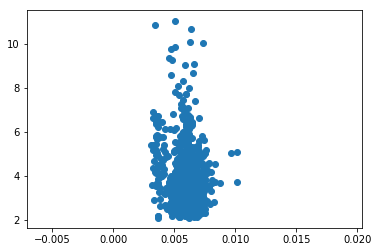

In [64]:

fig, ax = plt.subplots()
ax.scatter(df['mCCC/CCC'].values, df['% Genome covered'].values)
plt.show()


In [65]:
# move allc to allc trash

print(df.loc[df['mCCC/CCC'] > 0.02, 'Sample'].tolist())

df[df['mCCC/CCC']<0.02].set_index('Sample').to_csv(
    os.path.join(PATH_DATASETS, dataset, 'mapping_summary_{}.tsv'.format(dataset)), 
    sep='\t', na_rep='NA', header=True, index=True)

# truncate mapping summary and copy that into right place

[]


In [66]:

df.to_csv(os.path.join(path_dataset, 'mapping_summary_{}.tsv'.format(dataset)), 
                      sep='\t', na_rep='NA', header=True, index=False)

In [17]:
# with cd(path_dataset)
#     allc_files = sorted(glob.glob('./allc/allc_*.tsv.bgz'))
#     cells = [os.path.basename(allc_file)[len('allc_'): -len('.tsv.bgz')] for allc_file in allc_files]
# df_meta_dataset = df.set_index('Sample').loc[cells, :]

In [10]:
# print(df_meta_dataset.shape)

# df_meta_dataset.to_csv(os.path.join(path_dataset, 'mapping_summary_{}.tsv'.format(dataset)), 
#                       sep='\t', na_rep='NA', header=True, index=True)
# df_meta_dataset.head()